This is sceond part of a two part module to analyse data provided by  'AnAge Database of Animal Ageing and Longevity' . Iwould recommen the readers to go through the first part of the Excercise https://github.com/Rohit-Mishra04/AnimalData/blob/master/Animal%20Data%20Exploration%20Part1.ipynb 

To briefly explain I have extracted the Mammal data from the dataset and dropped some of the redundant columns. Once I am left with the required columns I drop all the records with missing Values to get a baseline efficiency. In this noebook I will run a quick model then I will try to analyse different features and fill the missing Values with some logic and see If in the end our model gets better or not.

In [2]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#importing Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
mam=pd.read_csv('C:\\python\\study\\dataset\\mammal.csv')

In [6]:
mam.head()

,Unnamed: 0,Order,Female_maturity_days,Gestation_Incubation_days,Weaning_days,Litter_Clutch_size,Litters_Clutches_per_year,Birth_weight_g,Adult_weight_g,Maximum_longevity_yrs,Temperature_K
0,1530,Afrosoricida,365.0,55.0,29.0,6.00,1.0,7.67,180.0,19.0,307.85
1,1531,Afrosoricida,NaN,63.0,37.0,3.90,2.0,0.70,6.7,NaN,303.95
2,1532,Afrosoricida,35.0,59.0,21.0,4.00,2.0,11.50,180.0,2.7,308.15
3,1533,Afrosoricida,669.0,61.0,29.0,2.67,NaN,3.95,37.8,5.6,304.05
4,1534,Afrosoricida,639.0,61.0,29.0,2.00,NaN,3.60,50.0,5.8,303.95


In [72]:
mam.drop(columns='Unnamed: 0',inplace=True)

In [73]:
X=mam.dropna()

In [74]:
Y=X.Order #Saving the Labels

In [75]:
X.drop(columns='Order',inplace=True)

C:\Users\aradh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [77]:
mgb=GradientBoostingClassifier(n_estimators=300,min_samples_leaf=4)

In [78]:
mgb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [79]:
accuracy_score(mgb.predict(x_test),y_test)

0.7818181818181819

Now I will try to undertand the features carefully and then try to find best possible strategy to impute data. let's sort the missing values and see correlation matrix.

In [80]:
mam.isnull().sum().sort_values(ascending=False)

Weaning_days                 519
Litters_Clutches_per_year    516
Birth_weight_g               480
Female_maturity_days         469
Maximum_longevity_yrs        317
Gestation_Incubation_days    305
Litter_Clutch_size            97
Adult_weight_g                19
Temperature_K                  0
Order                          0
dtype: int64

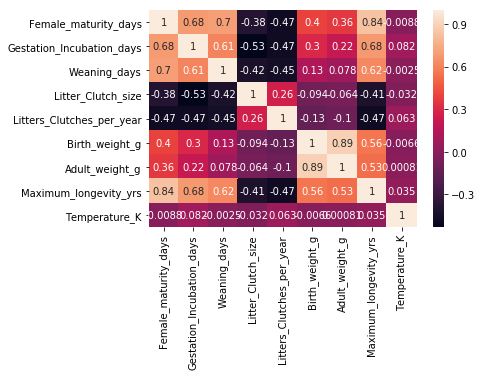

In [81]:
sns.heatmap(mam.corr(),annot=True)

# Maximum_longevity_yrs

C:\Users\aradh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


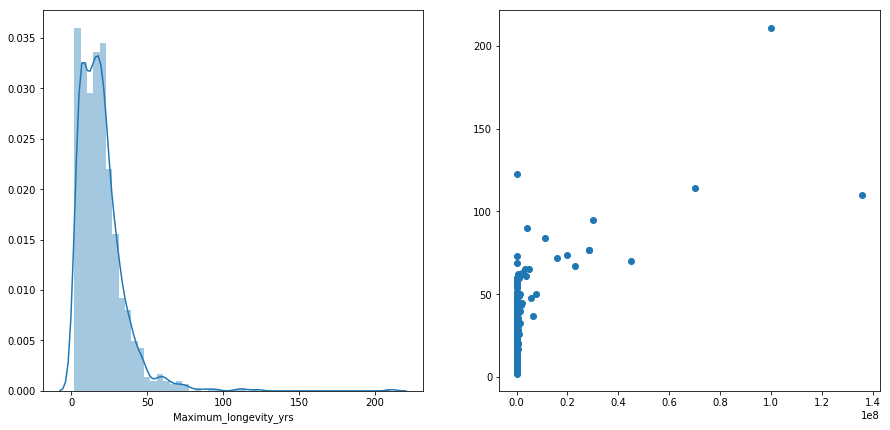

In [82]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(mam.loc[mam.Maximum_longevity_yrs.notnull()].Maximum_longevity_yrs)
plt.subplot(122)
plt.scatter(mam.Adult_weight_g,mam.Maximum_longevity_yrs)

In [83]:
mam.Maximum_longevity_yrs.describe()

count    1012.000000
mean       19.826581
std        15.551026
min         2.100000
25%         9.375000
50%        17.150000
75%        25.425000
max       211.000000
Name: Maximum_longevity_yrs, dtype: float64

There is not much difference between median and mean, data is skewed but not largely. So I am imputing missing data with median.

In [84]:
mam.Maximum_longevity_yrs.fillna(mam.Maximum_longevity_yrs.median(),inplace=True)

# Weaning Days

C:\Users\aradh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


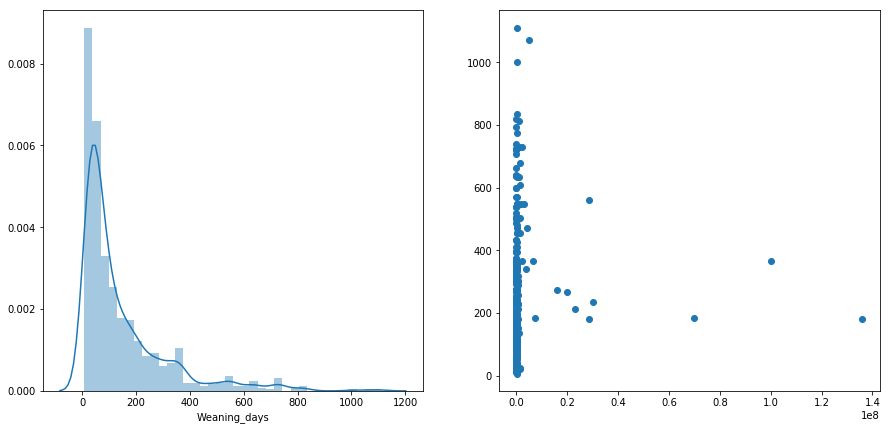

In [85]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(mam.loc[mam.Weaning_days.notnull()].Weaning_days)
plt.subplot(122)
plt.scatter(mam.Adult_weight_g,mam.Weaning_days)

In [86]:
mam.Weaning_days.describe()

count     810.000000
mean      143.759259
std       165.824986
min         7.000000
25%        36.000000
50%        77.000000
75%       182.750000
max      1111.000000
Name: Weaning_days, dtype: float64

Weaning days means time till which animal needs to be fed by mother.Plotting with Adult weight helps visualise the animal. 
We see data is quite skewed with high standard deviation. Imputing median in data with so high variance would not make sense. We see a high correlation of this with Maximum Longetivity. So a better idea would be to predict values using Linear Regression.

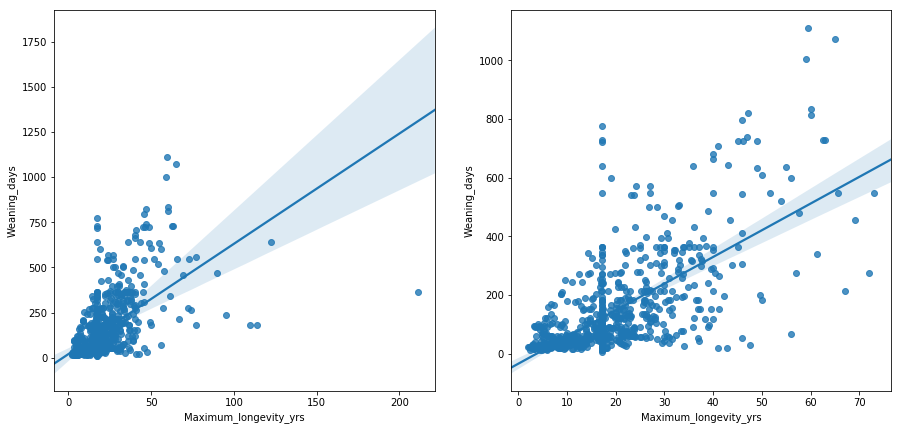

In [87]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.regplot(mam.Maximum_longevity_yrs,mam.Weaning_days)
ind=mam.Maximum_longevity_yrs.sort_values(ascending=False)[10:].index # removing some outliers
plt.subplot(122)
sns.regplot(mam.Maximum_longevity_yrs.loc[ind],mam.Weaning_days.loc[ind])

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
mod_lin=LinearRegression()

In [90]:
ind=mam.loc[mam.Weaning_days.notnull()].index # index for data where both is not missing
mod_lin.fit(mam.Maximum_longevity_yrs.loc[ind].values.reshape(-1,1),mam.Weaning_days.loc[ind].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
ind_miss=mam.loc[mam.Weaning_days.isnull()].index
weaning_days_pred=mod_lin.predict(mam.Maximum_longevity_yrs.loc[ind_miss].values.reshape(-1,1))# predicting using linear model 

In [92]:
mam.loc[ind_miss,'Weaning_days']=weaning_days_pred

# Litters_Clutches_per_year

C:\Users\aradh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


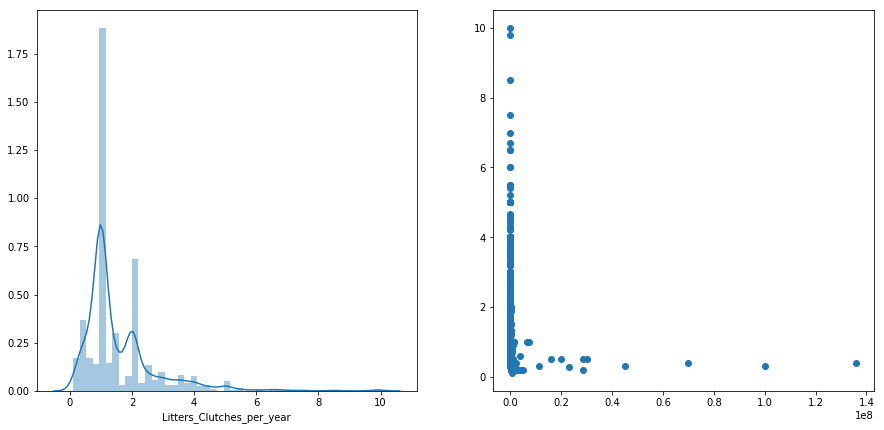

In [93]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(mam.loc[mam.Litters_Clutches_per_year.notnull()].Litters_Clutches_per_year)
plt.subplot(122)
plt.scatter(mam.Adult_weight_g,mam.Litters_Clutches_per_year)

In [94]:
mam.Litters_Clutches_per_year.describe()

count    813.000000
mean       1.569459
std        1.204807
min        0.100000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: Litters_Clutches_per_year, dtype: float64

Data has minimum Variance. I am imputing with median value.

In [95]:
mam.Litters_Clutches_per_year.fillna(mam.Litters_Clutches_per_year.median(),inplace=True)

# Adult_weight_g

C:\Users\aradh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


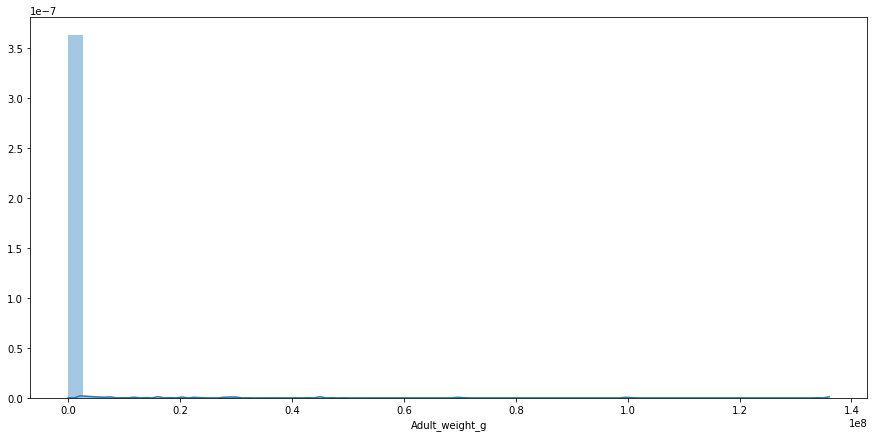

In [96]:
plt.figure(figsize=(15,7))
sns.distplot(mam.loc[mam.Adult_weight_g.notnull()].Adult_weight_g)

In [97]:
mam.Adult_weight_g.describe()

count    1.310000e+03
mean     4.618394e+05
std      5.473929e+06
min      2.100000e+00
25%      1.050000e+02
50%      1.399300e+03
75%      1.157500e+04
max      1.360000e+08
Name: Adult_weight_g, dtype: float64

Oh my God.Hardly anything visible. This is obvious, we are dealing with something diverse as weight of mouse to whales. Let's try to remove some outlier (rather some highest values ) to see if anything is visible.

C:\Users\aradh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


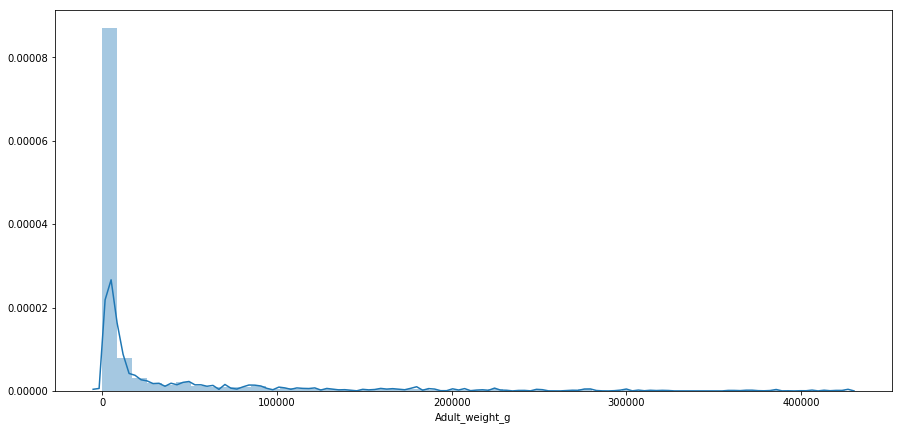

In [98]:
plt.figure(figsize=(15,7))
sns.distplot(mam.loc[mam.Adult_weight_g.notnull()].Adult_weight_g.sort_values(ascending=False)[50:])

Luckily some pattern emerges. Data is too diverse to impute mean,and other correlated features have more data missing. Better appraoch would be forward fill or backward fill.

In [99]:
mam.Adult_weight_g.ffill(limit=2,inplace=True)



# Birth_weight_g

C:\Users\aradh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


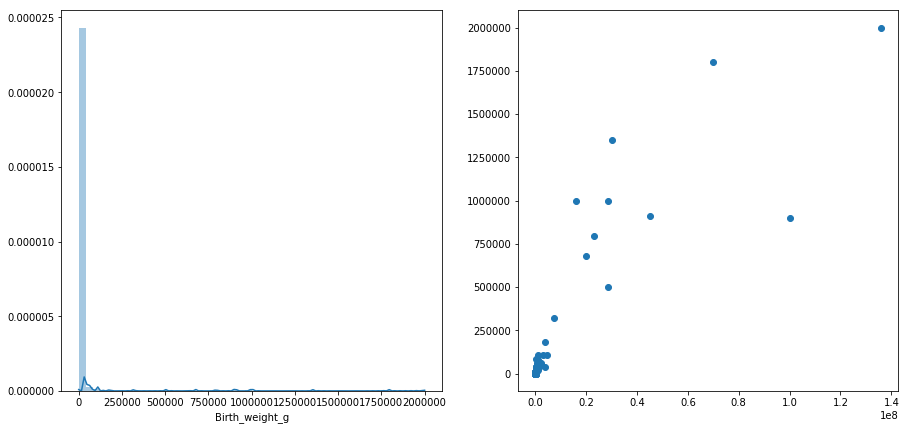

In [100]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(mam.loc[mam.Birth_weight_g.notnull()].Birth_weight_g)
plt.subplot(122)
plt.scatter(mam.Adult_weight_g,mam.Birth_weight_g)

The data is diverse and highly correlated with adult weight. I will impute it with ffill method.

In [108]:
mam.Birth_weight_g.ffill(limit=2,inplace=True)

In [110]:
mam.Birth_weight_g.bfill(limit=3,inplace=True)

# Gestation_Incubation_days

C:\Users\aradh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


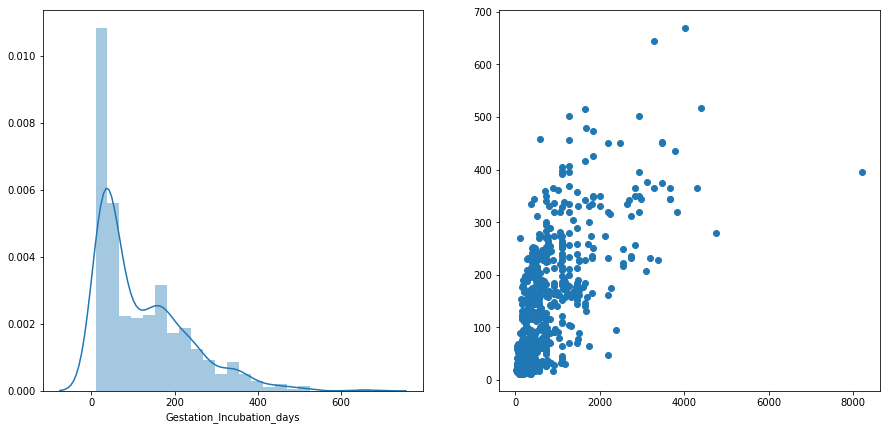

In [112]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(mam.loc[mam.Gestation_Incubation_days.notnull()].Gestation_Incubation_days)
plt.subplot(122)
plt.scatter(mam.Female_maturity_days,mam.Gestation_Incubation_days)

The data is diverse and highly correlated with Female_maturity_days. I will impute it with ffill method.

In [115]:
mam.Gestation_Incubation_days.ffill(limit=3,inplace=True)

In [116]:
mam.isnull().sum().sort_values(ascending=False)

Female_maturity_days         469
Litter_Clutch_size            97
Temperature_K                  0
Maximum_longevity_yrs          0
Adult_weight_g                 0
Birth_weight_g                 0
Litters_Clutches_per_year      0
Weaning_days                   0
Gestation_Incubation_days      0
Order                          0
dtype: int64

In [117]:
mam.Gestation_Incubation_days.ffill(limit=3,inplace=True)

# Litter_Clutch_size

C:\Users\aradh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


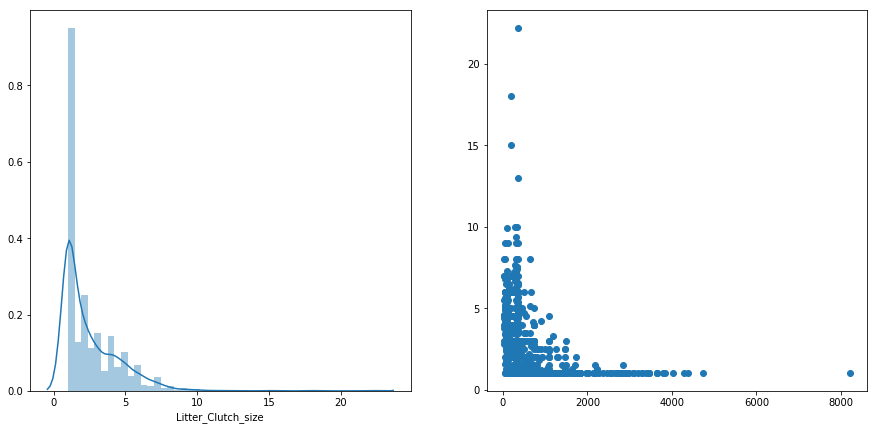

In [118]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(mam.loc[mam.Litter_Clutch_size.notnull()].Litter_Clutch_size)
plt.subplot(122)
plt.scatter(mam.Female_maturity_days,mam.Litter_Clutch_size)

Not much Variance. Median seems to be better method.

In [119]:
mam.Litter_Clutch_size.fillna(mam.Litter_Clutch_size.median(),inplace=True)

# Female_maturity_days

C:\Users\aradh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


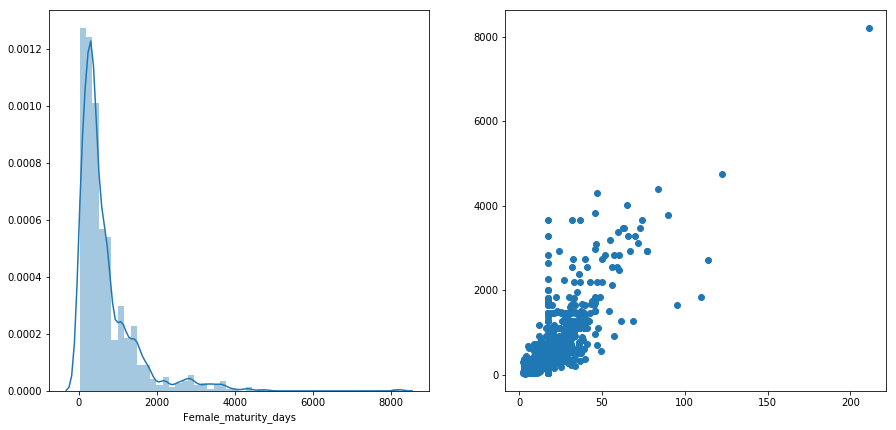

In [120]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(mam.loc[mam.Female_maturity_days.notnull()].Female_maturity_days)
plt.subplot(122)
plt.scatter(mam.Maximum_longevity_yrs,mam.Female_maturity_days)

Data is quite correlated with Maximum_longevity_yrs. I will try to fill data using Linear Regression.

In [121]:
ind=mam.loc[mam.Female_maturity_days.notnull()].index # index for data where both is not missing
mod_lin.fit(mam.Maximum_longevity_yrs.loc[ind].values.reshape(-1,1),mam.Female_maturity_days.loc[ind].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
ind_miss=mam.loc[mam.Female_maturity_days.isnull()].index
ind_miss

Int64Index([   1,   11,   15,   21,   26,   27,   29,   34,   36,   40,
            ...
            1295, 1296, 1299, 1304, 1307, 1310, 1312, 1318, 1319, 1324],
           dtype='int64', length=469)

In [123]:
ind_miss=mam.loc[mam.Female_maturity_days.isnull()].index
Female_mat_pred=mod_lin.predict(mam.Maximum_longevity_yrs.loc[ind_miss].values.reshape(-1,1))# predicting using linear model 

In [124]:
mam.loc[ind_miss,'Female_maturity_days']=Female_mat_pred

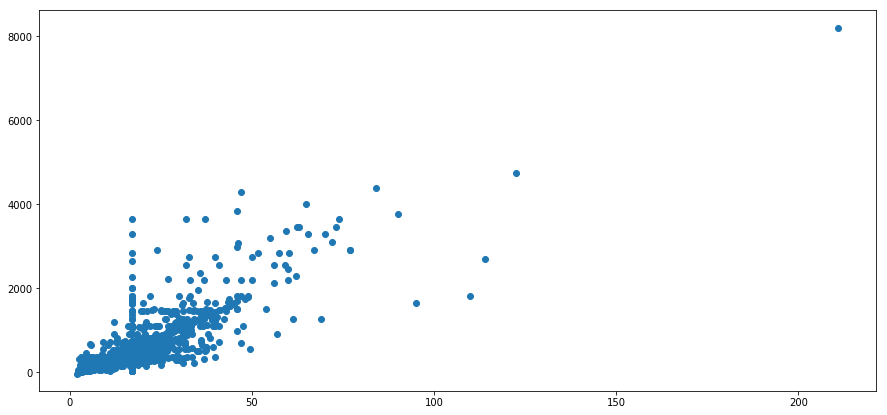

In [125]:
plt.figure(figsize=(15,7))
plt.scatter(mam.Maximum_longevity_yrs,mam.Female_maturity_days)

In [126]:
mam.isnull().sum().sort_values(ascending=False)

Temperature_K                0
Maximum_longevity_yrs        0
Adult_weight_g               0
Birth_weight_g               0
Litters_Clutches_per_year    0
Litter_Clutch_size           0
Weaning_days                 0
Gestation_Incubation_days    0
Female_maturity_days         0
Order                        0
dtype: int64

Finally I have filled all data with some logic. Let us see how our model runs. I will try with our most successfull model GradientBoost. Last accuracy was 0.754.  

In [127]:
X=mam

In [128]:
Y=X.Order #Saving the Labels

In [129]:
X.drop(columns='Order',inplace=True)

In [130]:
X.shape,Y.shape

((1329, 9), (1329,))

In [131]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [132]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((996, 9), (333, 9), (996,), (333,))

In [133]:
model_GB=GradientBoostingClassifier()

In [134]:
model_GB.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [135]:
accuracy_score(model_GB.predict(x_test),y_test)

0.8018018018018018

Better than last performance. Let's try to tune it.

In [136]:
model_GB_2=GradientBoostingClassifier(n_estimators=500 )

In [137]:
model_GB_2.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [138]:
accuracy_score(model_GB_2.predict(x_test),y_test)

0.8168168168168168

Thus we see, we have analysed the data, we understand a lot about our data and the model does some job in automatically classifying. The efficiency is not great but it gives me some satisfaction to think that, out of hundreds of animals, just based on features like weight, number of children, maturity Years etc a model can predict what is its order, something which trained scientists would find difficult to.